In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

data = pd.read_csv("beach_weather_station_no_missing_values.csv",index_col=0)
data.head(10)
data.info()
data2 =pd.read_csv("Stockholm,Sweden 2022-07-01 to 2023-11-25.csv")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59141 entries, 0 to 59143
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Name                 59141 non-null  object 
 1   Measurement Timestamp        59141 non-null  object 
 2   Air Temperature              59141 non-null  float64
 3   Humidity                     59141 non-null  float64
 4   Rain Intensity               59141 non-null  float64
 5   Interval Rain                59141 non-null  float64
 6   Total Rain                   59141 non-null  float64
 7   Wind Direction               59141 non-null  float64
 8   Wind Speed                   59141 non-null  float64
 9   Maximum Wind Speed           59141 non-null  float64
 10  Barometric Pressure          59141 non-null  float64
 11  Solar Radiation              59141 non-null  float64
 12  Battery Life                 59141 non-null  float64
 13  Measurement Time

In [2]:
data

,Station Name,Measurement Timestamp,Air Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Battery Life,Measurement Timestamp Label,Measurement ID
0,Oak Street Weather Station,05/22/2015 03:00:00 PM,13.282062,55.0,0.0,0.0,1.4,63.0,1.9,2.8,993.718263,780.0,12.0,05/22/2015 3:00 PM,OakStreetWeatherStation201505221500
1,Oak Street Weather Station,05/22/2015 05:00:00 PM,13.282062,56.0,0.0,0.0,1.4,124.0,1.5,2.3,993.718263,180.0,12.1,05/22/2015 5:00 PM,OakStreetWeatherStation201505221700
2,Oak Street Weather Station,05/22/2015 06:00:00 PM,13.282062,54.0,0.0,0.0,1.4,156.0,1.9,3.4,993.718263,127.0,12.1,05/22/2015 6:00 PM,OakStreetWeatherStation201505221800
3,Oak Street Weather Station,05/22/2015 07:00:00 PM,13.282062,53.0,0.0,0.0,1.4,150.0,1.4,4.5,993.718263,67.0,12.1,05/22/2015 7:00 PM,OakStreetWeatherStation201505221900
4,Oak Street Weather Station,05/22/2015 08:00:00 PM,13.282062,52.0,0.0,0.0,1.4,155.0,1.1,2.3,993.718263,10.0,12.0,05/22/2015 8:00 PM,OakStreetWeatherStation201505222000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59139,Oak Street Weather Station,11/08/2017 12:00:00 AM,4.700000,60.0,0.0,0.0,0.0,273.0,0.8,1.5,1005.400000,0.0,11.9,11/08/2017 12:00 AM,OakStreetWeatherStation201711082400
59140,Foster Weather Station,11/08/2017 12:00:00 AM,2.890000,58.0,0.0,0.0,69.8,278.0,2.1,2.3,1004.400000,0.0,15.2,11/08/2017 12:00 AM,FosterWeatherStation201711082400
59141,63rd Street Weather Station,11/08/2017 01:00:00 AM,3.400000,66.0,0.0,0.0,28.8,299.0,1.1,2.2,1004.600000,4.0,11.8,11/08/2017 1:00 AM,63rdStreetWeatherStation201711080100
59142,Oak Street Weather Station,11/08/2017 01:00:00 AM,4.200000,59.0,0.0,0.0,0.0,276.0,0.8,1.7,1005.400000,1.0,12.0,11/08/2017 1:00 AM,OakStreetWeatherStation201711080100


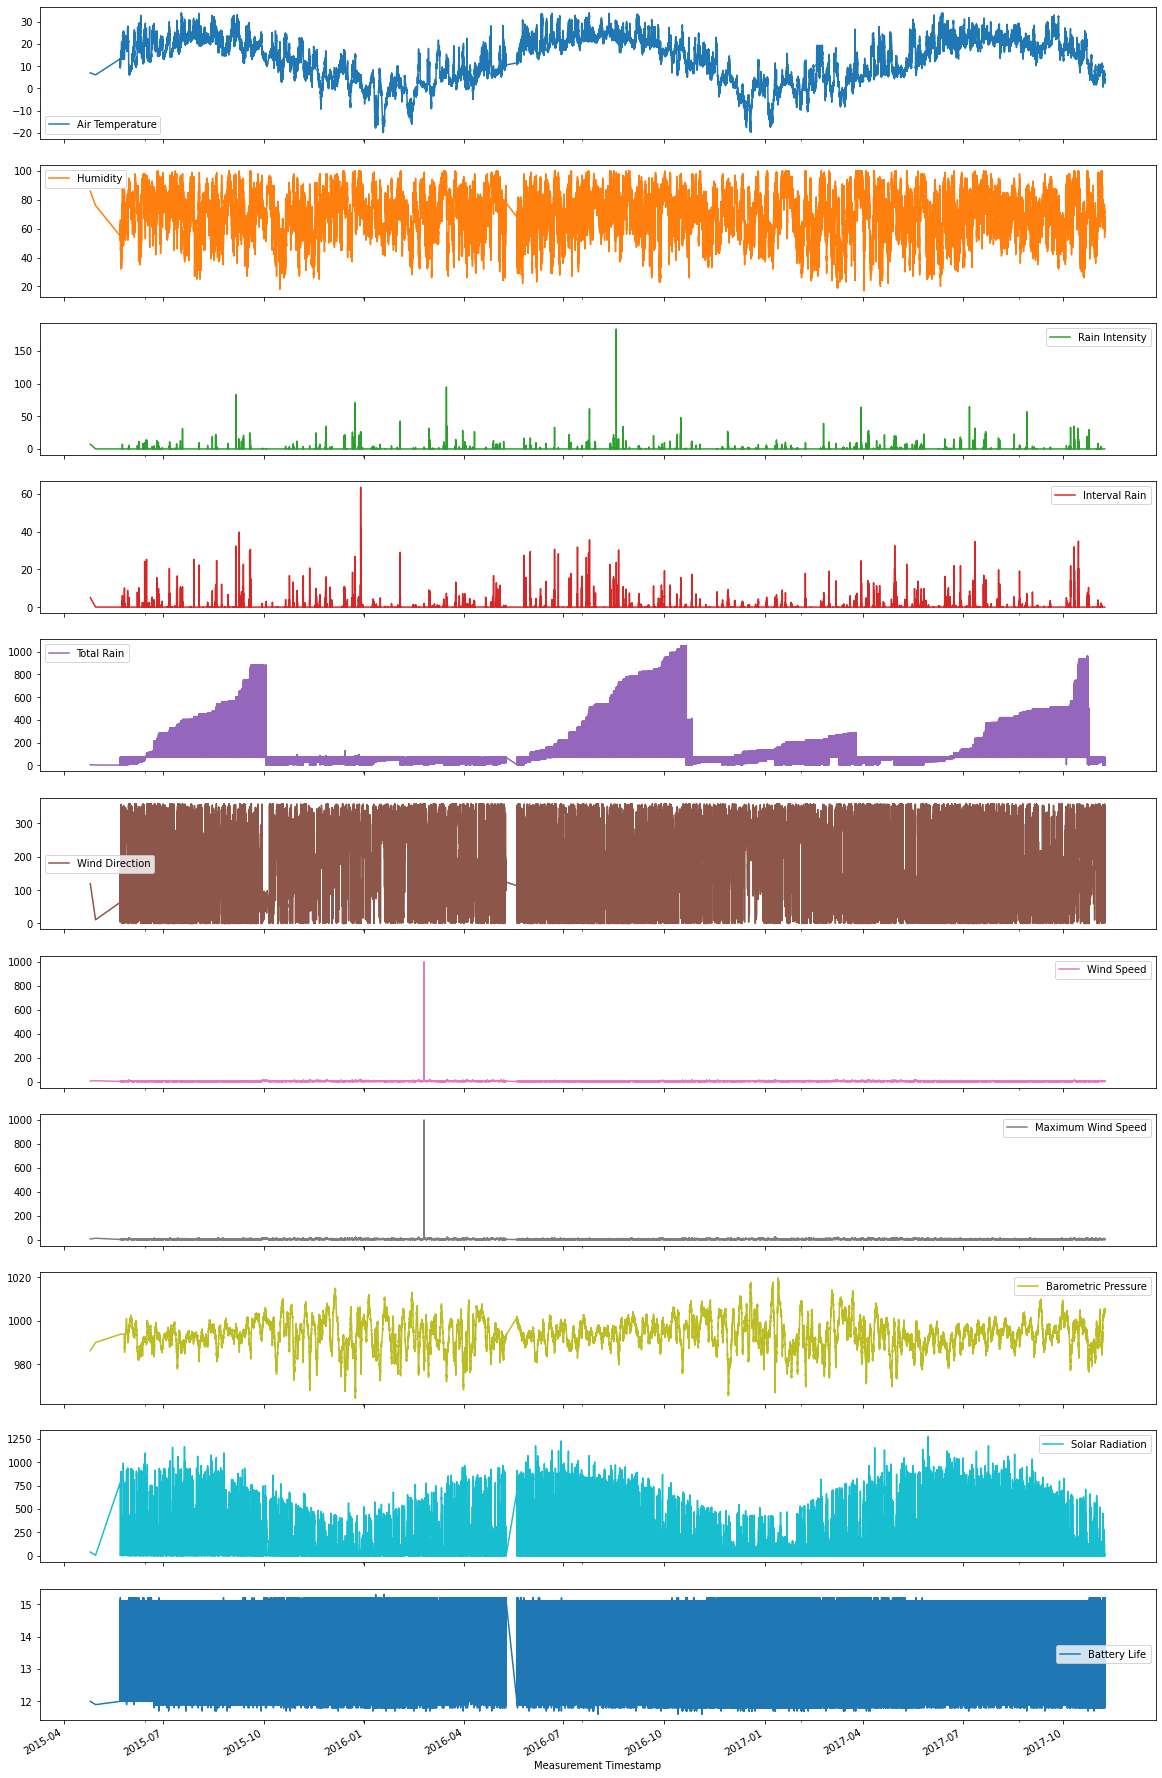

In [3]:
date_time = pd.to_datetime(data['Measurement Timestamp'].copy(), format='%m/%d/%Y %I:%M:%S %p')

# Select all columns except 'Measurement Timestamp'
plot_cols = [col for col in data.columns if col != 'Measurement Timestamp']
plot_features = data[plot_cols]
plot_features.index = date_time

# Plotting
plot_features.plot(figsize=(20, 35), subplots=True)
plt.show()

In [4]:
def plot_data(data):
    # Create a copy of the 'Measurement Timestamp' column for datetime conversion
    date_time = pd.to_datetime(data['Measurement Timestamp'].copy(), format='%m/%d/%Y %I:%M:%S %p')

    # Select all columns except 'Measurement Timestamp'
    plot_cols = [col for col in data.columns if col != 'Measurement Timestamp']
    plot_features = data[plot_cols]
    plot_features.index = date_time

    # Plotting
    plot_features.plot(figsize=(20, 35), subplots=True)
    plt.show()

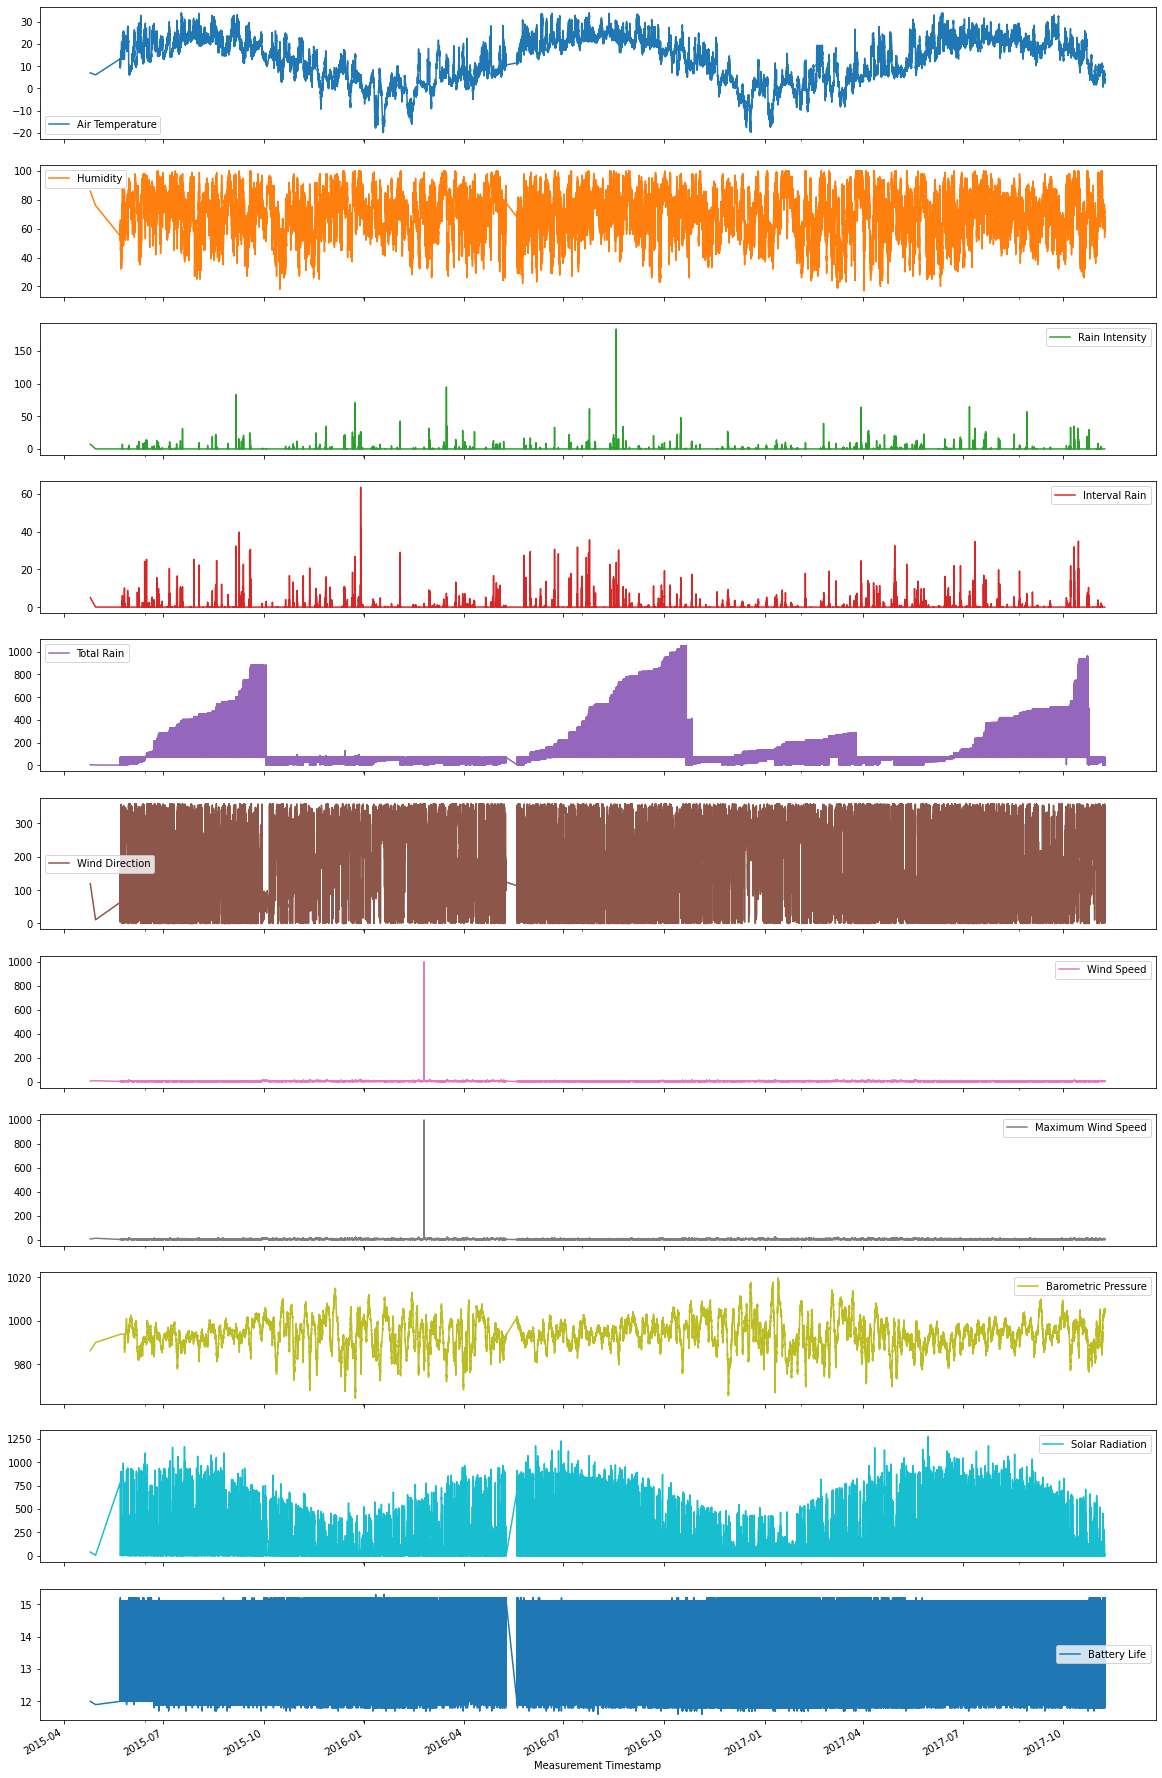

In [5]:
plot_data(data)

In [6]:

# Convert 'Measurement Timestamp' into a datetime object
data['Measurement Timestamp'] = pd.to_datetime(
    data['Measurement Timestamp'].copy(), format='%m/%d/%Y %I:%M:%S %p')

# Extracting time-related features
data['Year'] = data['Measurement Timestamp'].dt.year
data['Month'] = data['Measurement Timestamp'].dt.month
data['Day'] = data['Measurement Timestamp'].dt.day
data['Hour'] = data['Measurement Timestamp'].dt.hour
data['Minute'] = data['Measurement Timestamp'].dt.minute

# Dropping unnecessary columns
data_processed = data.drop(['Station Name', 'Measurement Timestamp', 
    'Measurement Timestamp Label', 'Measurement ID'], axis=1)

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data_processed)

# Function to create sequences
def create_sequences(data, n_steps, target_index):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, :])
        y.append(data[i + n_steps, target_index])
    return np.array(X), np.array(y)

# Number of time steps in each input sequence
n_steps = 5
target_index = data_processed.columns.get_loc("Air Temperature")

# Create sequences
X, y = create_sequences(data_normalized, n_steps, target_index)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Print the shapes of the datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(47308, 5, 16) (11828, 5, 16) (47308,) (11828,)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])


In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [9]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/20
1479/1479 [==============================] - 55s 36ms/step - loss: 0.0059 - val_loss: 0.0070
Epoch 2/20
1479/1479 [==============================] - 53s 36ms/step - loss: 0.0021 - val_loss: 0.0091
Epoch 3/20
1479/1479 [==============================] - 54s 37ms/step - loss: 0.0018 - val_loss: 0.0107
Epoch 4/20
1479/1479 [==============================] - 56s 38ms/step - loss: 0.0016 - val_loss: 0.0138
Epoch 5/20
1479/1479 [==============================] - 56s 38ms/step - loss: 0.0016 - val_loss: 0.0127
Epoch 6/20
1479/1479 [==============================] - 56s 38ms/step - loss: 0.0015 - val_loss: 0.0131
Epoch 6: early stopping
